# Exercise 3

## Function we want to minimize

$f(x) = x + y$ 

## subject to the constraint

$h1(x) = x + y + z - 1$

$ and $

$h2(x) = x^{2} + 2y^{2} + z^{2} - 1 $

# Let's define the merit function

## pure
- $p(x) = \frac{1}{2}h_{1}(x)^Th_{1}(x) + \frac{1}{2}h_{2}(x)^Th_{2}(x) = ||h(x)||_2^2 = \frac{1}{2}(x + y + z - 1)^T (x + y + z - 1) + \frac{1}{2}(x^{2} + 2y^{2} + z^{2} - 1)^T(x^{2} + 2y^{2} + z^{2} - 1)$

$P(x,\mu) = f(x) + \mu p(x) = x + y + \frac{\mu}{2}[(x + y + z - 1)^T (x + y + z - 1) + (x^{2} + 2y^{2} + z^{2} - 1)^T(x^{2} + 2y^{2} + z^{2} - 1)]$

## Augmented Lagrangian

$
\begin{equation}
\begin{aligned}
L(x,\lambda,\mu) &= f(x) + \lambda^T_{1}h_{1}(x) + \lambda^T_{2}h_{2}(x) + \frac{\mu}{2}(h_{1}(x)^Th_{1}(x) + h_{2}(x)^Th_{2}(x)) \\
&= x + y + \lambda_{1}^T(x + y + z - 1) + \lambda_{2}^T(x^{2} + 2y^{2} + z^{2} - 1) + \frac{\mu}{2}[(x + y + z - 1)^T (x + y + z - 1) + (x^{2} + 2y^{2} + z^{2} - 1)^T(x^{2} + 2y^{2} + z^{2} - 1)]
\end{aligned}
\end{equation}
$

# Algorithms

## pure

1. For $k=0$ choose: $\mu_0, x_0$
2. $x_{k+1}$ = $argmin_x$ $P(x, \mu_k)$
3. Choose $\mu_{k+1} > \mu_k$, $k=k+1$, repeat step 2.

## Augmented Lagrangian

1. For $k=0$, choose: $\lambda_0, x_0, \mu_0$
2. $x_{k+1}$ = $argmin_x$ $L(x,\lambda_k, \mu_k)$
3. $\lambda_k$


# Roadmap

- [x] Find optimization algorithm from scipy
2. Create naive optimization loop for pure method (no visualizations, no keeping track of metrics) [ ]
3. Once that is done, start recording certain metrics (nº iterations, $f(x_k)$, $P(x,\mu)$, $\mu$ ) [ ]
4. Repeat 2,3 for Augmented Lagrangian [ ]



In [6]:
# optimization algorithm to minimize unconstrained function
from scipy.optimize import minimize
import pandas as pd
import numpy as np
import matplotlib as plt
from scipy.optimize import newton

In [2]:
# function to minimize
f = lambda x: x[0] + x[1]
# its gradient/jacobian
JacF = lambda x: [1, 1]
# norm of its gradient/jacobian
normJacF = lambda x: np.linalg.norm(JacF(x))
# constraint
h1 = lambda x: x[0] + x[1] + x[2] - 1
h2 = lambda x: x[0]**2 + 2*x[1]**2 + x[2]**2 - 1

## Penalty Method

In [48]:
# feasibility penalization function
p = lambda x: 1/2 *( h1(x)**2 + h2(x)**2 )
# Merit function
P = lambda mu: lambda x: f(x) + mu*p(x)
JacP = lambda mu: lambda x: np.array([2*mu*x[0]*(x[0]**2 +2*x[1]**2 +x[2]**2 -1 ) + mu *(x[0]+x[1]+x[2]-1) +1 ,
                                     4*mu*x[1]*(x[0]**2 +2*x[1]**2 +x[2]**2 -1 ) + mu *(x[0]+x[1]+x[2]-1) +1,
                                     mu*(2*x[2]*(x[0]**2 +2*x[1]**2 +x[2]**2 -1) +x[0]+x[1]+x[2]-1)])

In [49]:
data = pd.DataFrame(columns=['iteration','x', 'f(x)',"||f'(x)||",'P(x)','p(x)','h1(x)','h2(x)','mu', 'mu*h1(x)', 'mu*h2(x)']).set_index('iteration')
# initial condition
i=0 # iteration
x = [20,30,15]
mu = 30
data.loc[i] = [x,f(x),normJacF(x),P(mu)(x),p(x),h1(x), h2(x), mu, mu*h1(x), mu*h2(x)]
data

,x,f(x),||f'(x)||,P(x),p(x),h1(x),h2(x),mu,mu*h1(x),mu*h2(x)
iteration,,,,,,,,,,
0,"[20, 30, 15]",50,1.414214,88198130.0,2939936.0,64,2424,30,1920,72720


In [58]:
# start optimization loop
# Run this cell again to get more iterates
i += 1 
result = newton(JacP(mu), x, maxiter=10000,disp=False)
x = result
data.loc[i] = [x, f(x), normJacF(x), P(mu)(x), p(x), h1(x), h2(x), mu, mu*h1(x), mu*h2(x)]
mu *= 2
data.tail(3)

,x,f(x),||f'(x)||,P(x),p(x),h1(x),h2(x),mu,mu*h1(x),mu*h2(x)
iteration,,,,,,,,,,
7,"[-0.0006689814162367001, 1.8374464558251165e-0...",-0.000650607,1.414214,-0.000325,1.694369e-07,-0.000520498,0.000260682,1920,-0.999357,0.50051
8,"[0.0018685385195829306, -0.002186503039349827,...",-0.000317965,1.414214,-0.000156,4.211821e-08,-0.000259597,0.000129792,3840,-0.996851,0.498403
9,"[0.0002027824719379586, -0.0003654023986967964...",-0.00016262,1.414214,-0.000081,1.059822e-08,-0.000130247,6.50549e-05,7680,-1.0003,0.499621


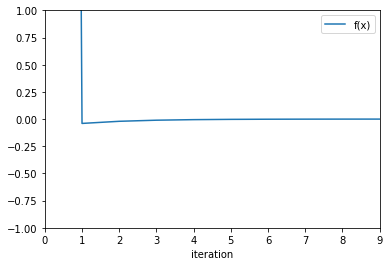

In [61]:
data.plot(y='f(x)', use_index=True,ylim=(-1,1))

x seems to be converging to something around (1,1,0)

## Augmented Lagrangian Method

In [62]:
# feasibility penalization function
p = lambda x: 1/2 * (h1(x)**2 + h2(x)**2)
# Merit function
L = lambda mu,lamb1,lamb2: lambda x: f(x) + lamb1*h1(x) + lamb2*h2(x) + mu*p(x)

JacL = lambda mu,lamb1,lamb2: lambda x: np.array([
    1 + lamb1 + 2*lamb2*x[0] + 2*mu*x[0]*(x[0]**2 +2*x[1]**2 +x[2]**2 -1 ) + mu *(x[0]+x[1]+x[2]-1),
    1 + lamb1 + 4*lamb2*x[1] + 4*mu*x[1]*(x[0]**2 +2*x[1]**2 +x[2]**2 -1 ) + mu *(x[0]+x[1]+x[2]-1),
    lamb1 + 2*lamb2*x[2] + mu*(2*x[2]*(x[0]**2 +2*x[1]**2 +x[2]**2 -1) +x[0]+x[1]+x[2]-1)])

In [63]:
dataAug = pd.DataFrame(columns=['iteration','x', 'f(x)',"||f'(x)||",'L(x)','p(x)','h1(x)', 'h2(x)','mu','lambda1','lambda2']).set_index('iteration')
# initial condition
j=0 # iteration
w = [20,30,15]
mu = 2
lamb1 = 2
lamb2 = 2
dataAug.loc[j] = [w,f(w),normJacF(w),L(mu,lamb1,lamb2)(w),p(w),h1(w),h2(w),mu,lamb1,lamb2]
dataAug

,x,f(x),||f'(x)||,L(x),p(x),h1(x),h2(x),mu,lambda1,lambda2
iteration,,,,,,,,,,
0,"[20, 30, 15]",50,1.414214,5884898.0,2939936.0,64,2424,2,2,2


In [73]:
j += 1 
res = newton(JacL(mu,lamb1,lamb2), w, maxiter=15000,disp=False)
w = res
mu *= 2
lamb1 = lamb1 + mu * h1(w)
lamb2 = lamb2 + mu * h2(w)
dataAug.loc[j] = [w, f(w), normJacF(w), L(mu,lamb1,lamb2)(w), p(w), h1(w),h2(w), mu, lamb1,lamb2]
dataAug.tail(3)

,x,f(x),||f'(x)||,L(x),p(x),h1(x),h2(x),mu,lambda1,lambda2
iteration,,,,,,,,,,
8,"[0.0016578850756566168, 0.0008103244495448197,...",0.00246821,1.414214,0.023284,0.000023,0.00482136,0.0047159,512,0.232647,1.70691
9,"[-0.0004898327327410796, -0.000734508619074412...",-0.00122434,1.414214,0.011613,0.000006,-0.00240466,-0.00235792,1024,-2.22972,-0.707595
10,"[0.0008216629601915696, -0.0002095196590835830...",0.000612143,1.414214,0.005806,0.000001,0.00120131,0.00117945,2048,0.230572,1.70793


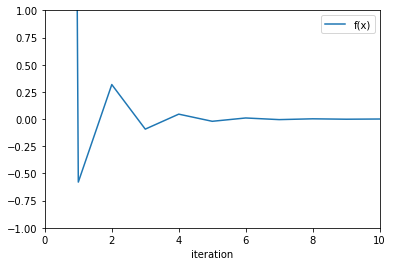

In [75]:
dataAug.plot(y='f(x)', use_index=True,ylim=(-1,1))